In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

In [2]:
layer_num = 5

In [3]:
simCLR = torch.load("./Models/simCLR_layer"+str(layer_num)+".pt").cpu()
MLP = torch.load("./Models/mlp_layer"+str(layer_num)+".pt").cpu()

In [4]:
SimCLR_extract_output = list(simCLR.children())[0]
SimCLR_Layer_List = list(list(list(SimCLR_extract_output.children())[0].children())[0].children())
SimCLR_Layer_List[0]

Linear(in_features=784, out_features=200, bias=True)

In [5]:
MLP_extract_output = nn.Sequential(*list(MLP.children())[0])

In [6]:
MLP_weight = []
i = 0
for name,param in MLP_extract_output.named_parameters():
    if name == str(i)+".weight":    
        print(name)
        print(torch.Tensor(param.cpu().detach().numpy()).size())
        MLP_weight.append(torch.Tensor(param.cpu().detach().numpy()))
        i = i+2

0.weight
torch.Size([200, 784])
2.weight
torch.Size([200, 200])
4.weight
torch.Size([200, 200])
6.weight
torch.Size([150, 200])
8.weight
torch.Size([100, 150])


In [7]:
SimCLR_weight = []
i = 0
for name,param in SimCLR_extract_output.named_parameters():
    if name == "baseModel.layers."+str(i)+".weight":
        
        print(name)
        print(torch.Tensor(param.cpu().detach().numpy()))
        SimCLR_weight.append(torch.Tensor(param.cpu().detach().numpy()))
        i = i+2

baseModel.layers.0.weight
tensor([[-0.0915, -0.0026,  0.0020,  ...,  0.1659,  0.1196, -0.1352],
        [ 0.0516, -0.0035, -0.1058,  ..., -0.1255,  0.1021,  0.0007],
        [-0.0253,  0.0147,  0.0955,  ..., -0.0751,  0.0260,  0.0292],
        ...,
        [-0.0049, -0.0993, -0.0267,  ...,  0.0190, -0.0434, -0.1379],
        [-0.0648,  0.0080, -0.0206,  ..., -0.0555,  0.0249,  0.0280],
        [ 0.0113, -0.0770, -0.1225,  ..., -0.1739,  0.0813,  0.0133]])
baseModel.layers.2.weight
tensor([[-0.0258,  0.0459, -0.0398,  ..., -0.0889,  0.0566, -0.0980],
        [ 0.1378, -0.0011, -0.1916,  ...,  0.2038,  0.1104, -0.2500],
        [ 0.1868,  0.1186,  0.0648,  ...,  0.0097,  0.1265, -0.0248],
        ...,
        [-0.1621, -0.3651,  0.1053,  ...,  0.0917, -0.0045,  0.0161],
        [ 0.0107, -0.0302, -0.1275,  ..., -0.0836, -0.1102,  0.0059],
        [ 0.0092,  0.0408,  0.0843,  ..., -0.0217,  0.0043,  0.0643]])
baseModel.layers.4.weight
tensor([[ 0.0344, -0.0548, -0.0846,  ..., -0.4084, -0.

In [8]:
torch.svd(MLP_weight[0])

torch.return_types.svd(
U=tensor([[ 0.0064, -0.0278, -0.0046,  ...,  0.0332, -0.1533,  0.0937],
        [-0.0474, -0.0487,  0.1023,  ...,  0.0011, -0.0234, -0.0127],
        [ 0.1059,  0.2208, -0.0356,  ...,  0.0161, -0.0632, -0.0026],
        ...,
        [ 0.0982, -0.0207,  0.0935,  ..., -0.0067, -0.1082, -0.0379],
        [-0.0392,  0.0096,  0.0302,  ..., -0.0873,  0.0619, -0.0460],
        [-0.0331, -0.0649, -0.0614,  ...,  0.0415, -0.0401,  0.0921]]),
S=tensor([1.7028, 1.4440, 1.3884, 1.3586, 1.2783, 1.2428, 1.2110, 1.1662, 1.1394,
        1.0969, 1.0579, 1.0405, 1.0281, 0.9823, 0.9591, 0.9308, 0.9185, 0.9075,
        0.8958, 0.8811, 0.8747, 0.8644, 0.8570, 0.8421, 0.8392, 0.8346, 0.8221,
        0.8216, 0.8171, 0.8102, 0.8024, 0.7933, 0.7823, 0.7804, 0.7767, 0.7740,
        0.7658, 0.7632, 0.7568, 0.7544, 0.7530, 0.7488, 0.7472, 0.7422, 0.7386,
        0.7343, 0.7338, 0.7292, 0.7252, 0.7241, 0.7186, 0.7160, 0.7142, 0.7097,
        0.7089, 0.7036, 0.7027, 0.7011, 0.6970, 0.6954, 0

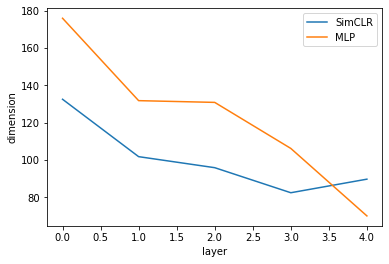

In [9]:
dimension_SimCLR_weight = []
dimension_MLP_weight = []

for i in range(len(MLP_weight)):
    dimension_MLP_weight.append((sum(torch.svd(MLP_weight[i])[1]))**2/sum(torch.svd(MLP_weight[i])[1]**2))
    dimension_SimCLR_weight.append((sum(torch.svd(SimCLR_weight[i])[1]))**2/sum(torch.svd(SimCLR_weight[i])[1]**2))
    #plt.legend(('adtest_SimCLR', 'adtest_MLP', 'SimCLR','MLP')) 

plt.plot(dimension_SimCLR_weight, label='SimCLR')
plt.plot(dimension_MLP_weight,label='MLP')

plt.ylabel('dimension')
plt.xlabel('layer')
plt.legend()

plt.savefig('./SVD_image/layer'+str(len(MLP_weight))+'.png')

plt.show()


In [10]:
dimension_MLP_weight[2]

tensor(130.8437)

In [11]:
(sum(torch.svd(torch.rand(100, 150))[1]))**2/sum(torch.svd(torch.rand(100,150))[1]**2)

tensor(28.7748)